In [2]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
import sys
import coffea.util as util
import time
import json
import os
import copy
from hist import Hist
sys.path.append("../../analysisTools/")
import plotTools as ptools
import utils
import mplhep as hep
import utils
hep.style.use("CMS")
plt.rcParams['font.size'] = 16.0
from matplotlib.colors import Normalize, LogNorm
from copy import deepcopy
from tqdm import tqdm
from matplotlib.lines import Line2D
from matplotlib.patches import Patch

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
class histContainer:
    def __init__(self,path,noMeta=False,bkg=False):
        if noMeta:
            self.histos, self.metadata = util.load(path), None
        else:
            self.histos, self.metadata = util.load(path)
        self.hnames = list(self.histos.keys())
        if bkg:
            self.catSamps,self.catNames = utils.bkg_categories(self.histos['cutflow'])
            self.cats = list(self.catSamps.keys())
    def load(self,hname):
        return self.histos[hname]
    def load(self,hname):
        return self.histos[hname]
    def names(self,spec=None):
        if spec is not None:
            print("\n".join([h for h in self.hnames if spec in h]))
        else:
            print("\n".join(self.hnames))
            
def getPresentSamples(h,possibleSamples):
    for a in h.axes:
        if a.name=='samp':
            ax = a
            break
    nbins = len(ax.centers)
    avail = [ax.bin(i) for i in range(nbins)]
    return [p for p in possibleSamples if p in avail]

def make_label(row):
    m1 = int(row['m1'])
    delta = int(100*row['delta'])
    ct = int(row['ctau'])
    label = f"{delta}%, {m1} GeV, {ct} mm"
    return label

In [18]:
hcd = histContainer("skimmed_data_histos_cuts_VR.coffea")
hcb = histContainer("skimmed_bkg_histos_cuts_VR.coffea",bkg=True)

In [19]:
cfd = hcd.load('cutflow_nevts')
cfb = hcb.load('cutflow_cts')

In [20]:
cfd

{'data_2018_Data_MET_UL18_Run2018D': defaultdict(int,
             {'all': 151720, 'hasVtx': 1335, 'cut0': 1335, 'cut3': 10}),
 'data_2018_Data_MET_UL18_Run2018B': defaultdict(int,
             {'all': 31409, 'hasVtx': 287, 'cut0': 287, 'cut3': 1}),
 'data_2018_Data_MET_UL18_Run2018A': defaultdict(int,
             {'all': 61102, 'hasVtx': 544, 'cut0': 544, 'cut3': 2}),
 'data_2018_Data_MET_UL18_Run2018C': defaultdict(int,
             {'all': 34563, 'hasVtx': 335, 'cut0': 335, 'cut3': 1})}

In [21]:
d_yield = 0
for k in cfd.keys():
    d_yield += cfd[k]['cut3']
    
b_yield = 0
for k in cfb.keys():
    b_yield += cfb[k]['cut3']
    
print(b_yield)
print(d_yield)

6.917657113509284
14


[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f39c0592940>, errorbar=None, legend_artist=None),
 StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f39c0592c70>, errorbar=None, legend_artist=None)]

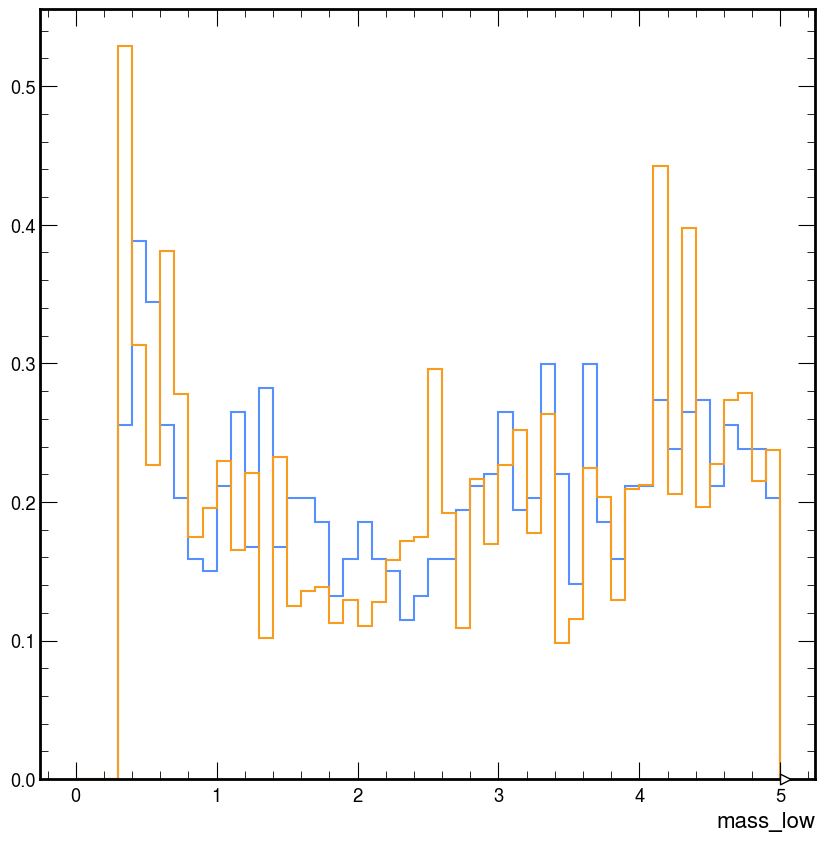

In [37]:
h1 = hcd.load("sel_vtx_mass_low")[{"samp":sum,"vtype":sum,"cut":"cut0"}][::10j]
h2 = hcb.load("sel_vtx_mass_low")[{"samp":sum,"vtype":sum,"cut":"cut0"}][::10j]
hep.histplot([h1,h2],yerr=False,density=True)

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f39c0a08430>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>),
 StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f39c099eaf0>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

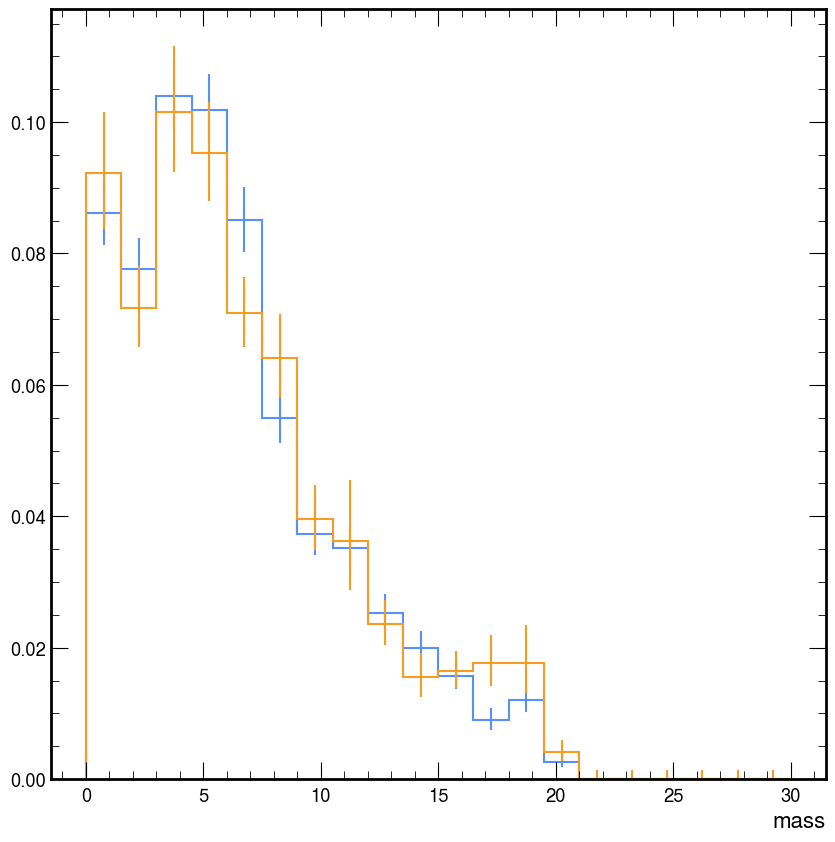

In [33]:
h1 = hcd.load("sel_vtx_mass")[{"samp":sum,"vtype":sum,"cut":"cut0"}][::5j]
h2 = hcb.load("sel_vtx_mass")[{"samp":sum,"vtype":sum,"cut":"cut0"}][::5j]
hep.histplot([h1,h2],yerr=True,density=True)

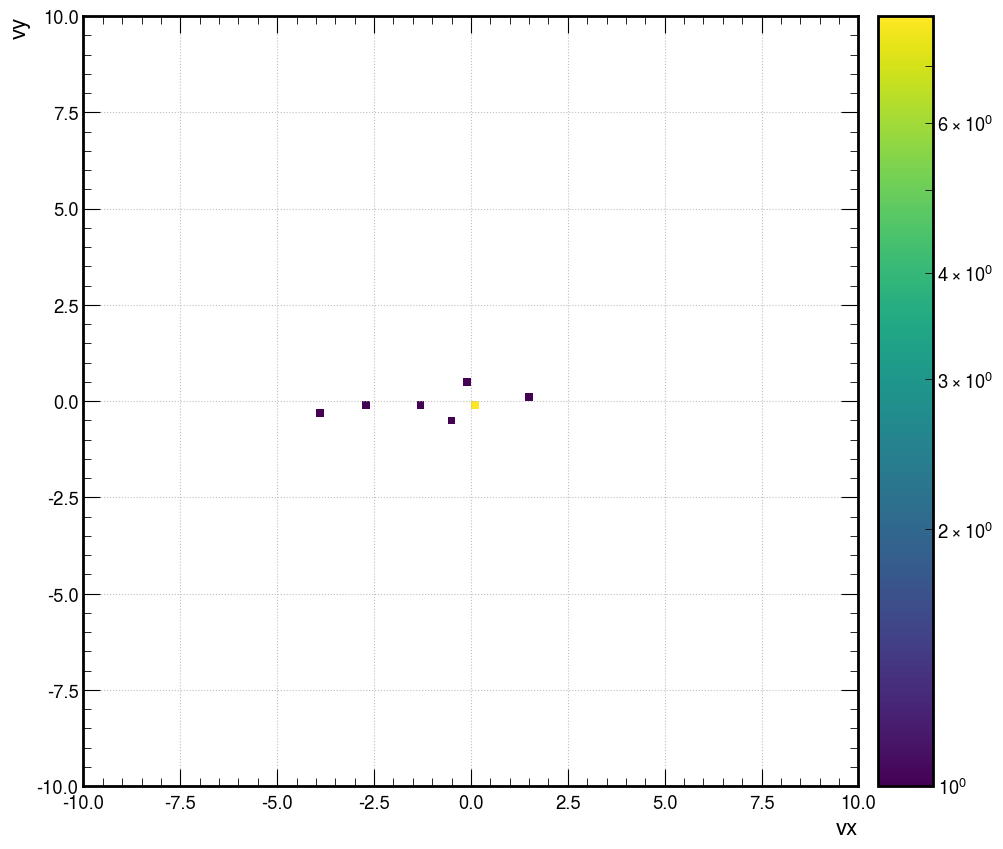

In [42]:
h1 = hcd.load("sel_vtx_vx_vs_vy")[{"samp":sum,"vtype":sum,"cut":"cut3"}]
hep.hist2dplot(h1,norm=LogNorm())
plt.grid()